In [10]:
#libraries
#Import below any other packages you need for your solution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, roc_curve,classification_report,ConfusionMatrixDisplay
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as imb_make_pipeline

In [27]:
#Read the dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
X.head(10)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
5,1,1,1,25,1,0,0,1,1,1,...,1,0,2,0,2,0,1,10,6,8
6,1,0,1,30,1,0,0,0,0,0,...,1,0,3,0,14,0,0,9,6,7
7,1,1,1,25,1,0,0,1,0,1,...,1,0,3,0,0,1,0,11,4,4
8,1,1,1,30,1,0,1,0,1,1,...,1,0,5,30,30,1,0,9,5,1
9,0,0,1,24,0,0,0,0,0,1,...,1,0,2,0,0,0,1,8,4,3


In [8]:
print(y.value_counts())
print(y.value_counts(normalize=True))

Diabetes_binary
0                  218334
1                   35346
Name: count, dtype: int64
Diabetes_binary
0                  0.860667
1                  0.139333
Name: proportion, dtype: float64


## 

the degree is moderate for 13% data belong to minor class

In [26]:
print(X.nunique())

HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64


<Figure size 1200x8400 with 0 Axes>

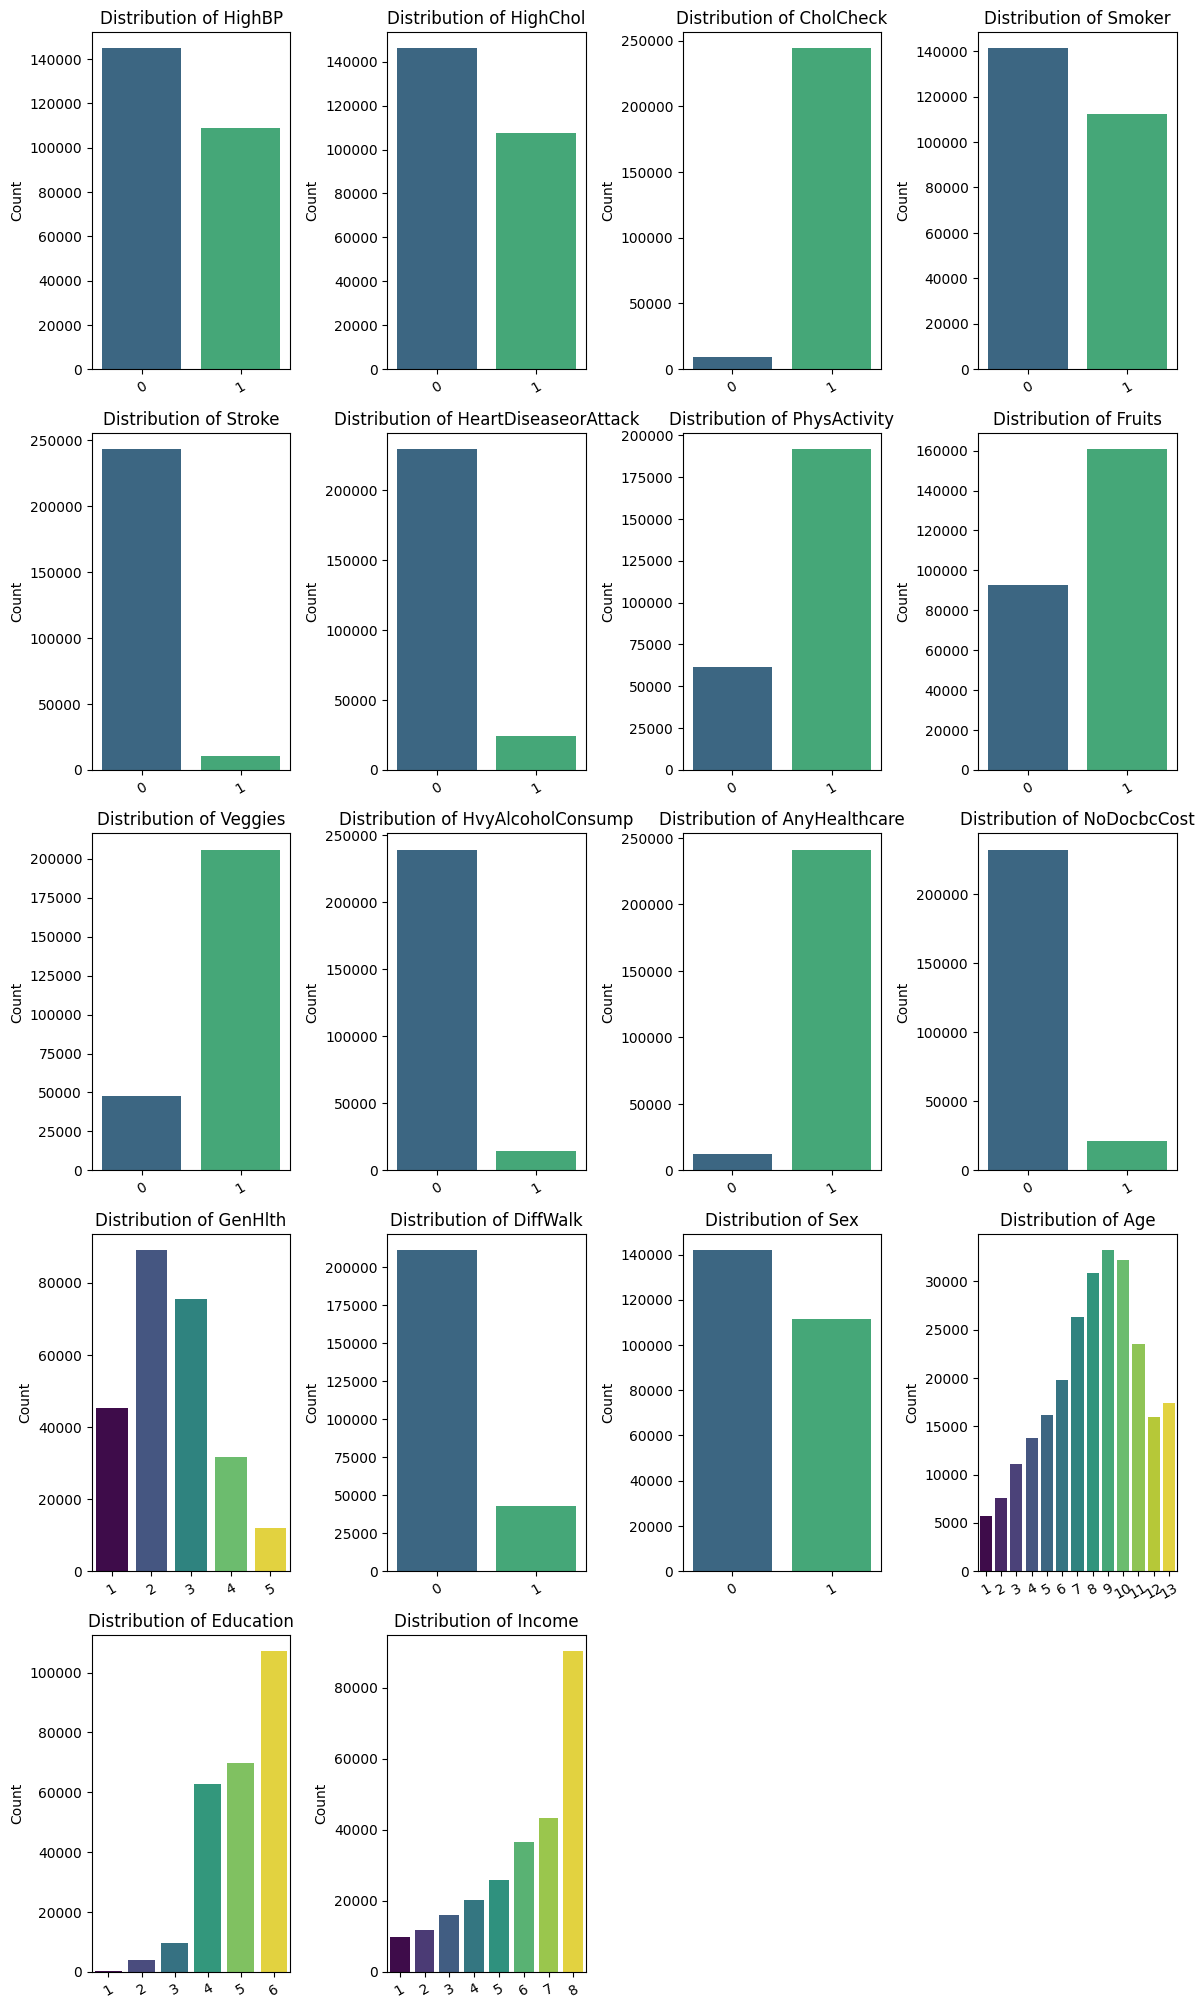

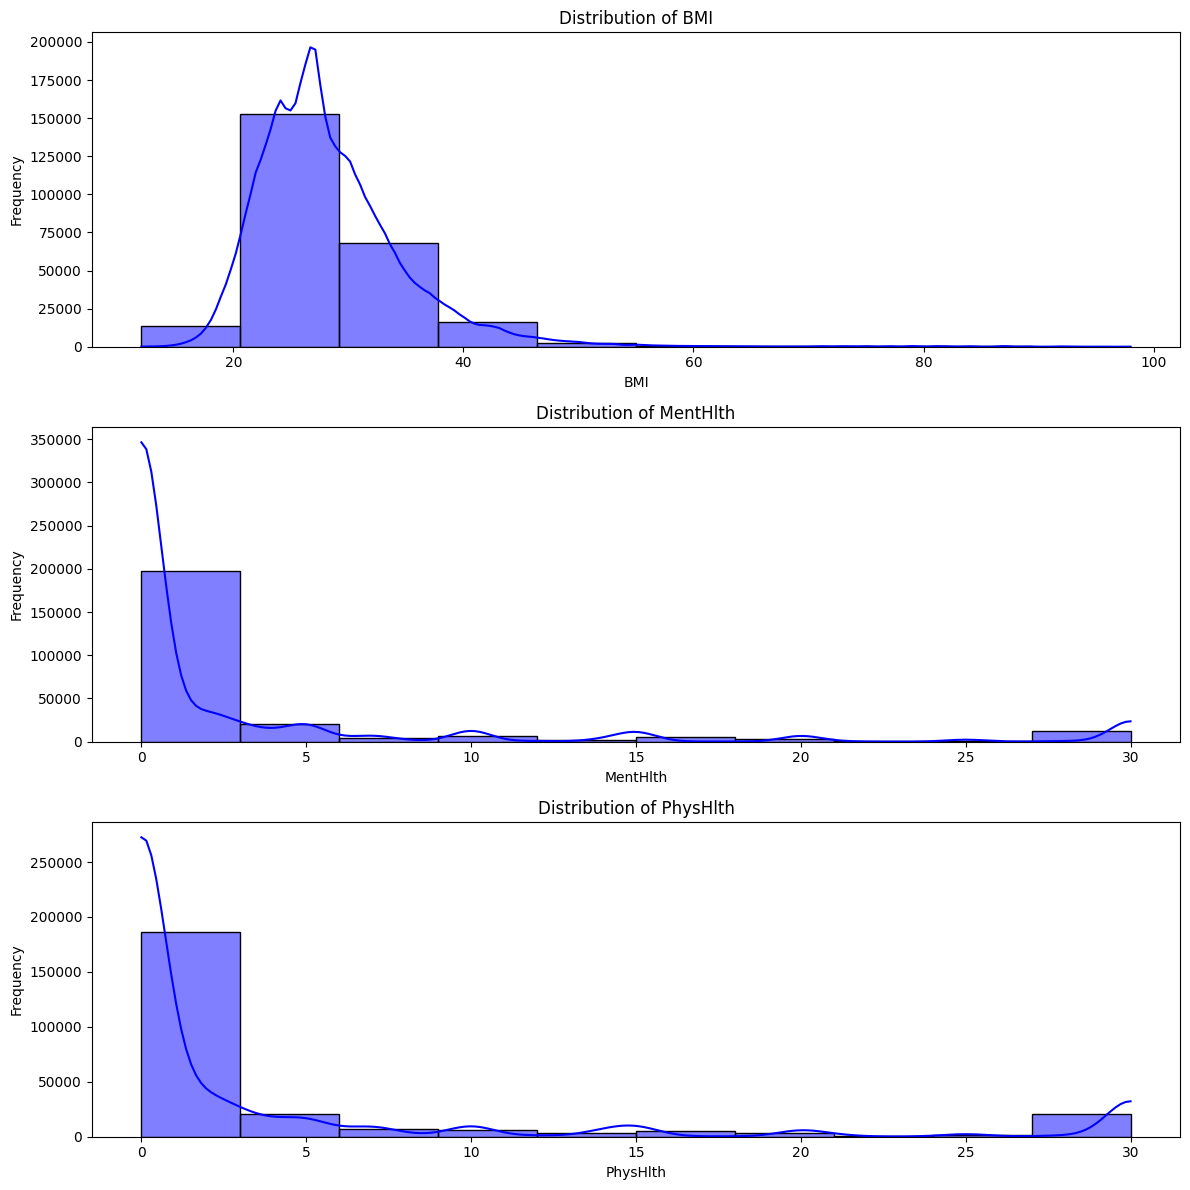

In [19]:
plt.figure(figsize=(12, 4 * len(X.columns))) 
numeric_vars = ['BMI', 'MentHlth', 'PhysHlth']
categorical_vars = [col for col in X.columns if col not in numeric_vars]

plt.figure(figsize=(12, 4 * len(categorical_vars)))
for i, col in enumerate(categorical_vars,1):
    plt.subplot(len(categorical_vars), 4, i)
    sns.countplot(x=X[col], hue=X[col], legend=False, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4 * len(numeric_vars)))
for i, col in enumerate(numeric_vars, 1):
    plt.subplot(len(numeric_vars), 1, i)
    sns.histplot(X[col], bins=10, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

In [22]:
preprocess = make_column_transformer(
    (StandardScaler(),numeric_vars),
    remainder = 'passthrough'
)

In [23]:
X_dev_transformed = preprocess.fit_transform(X_dev,y_dev)
X_test_transformed = preprocess.transform(X_test)

print(X_dev_transformed.shape)
print(X_test_transformed.shape)


(202944, 21)
(50736, 21)


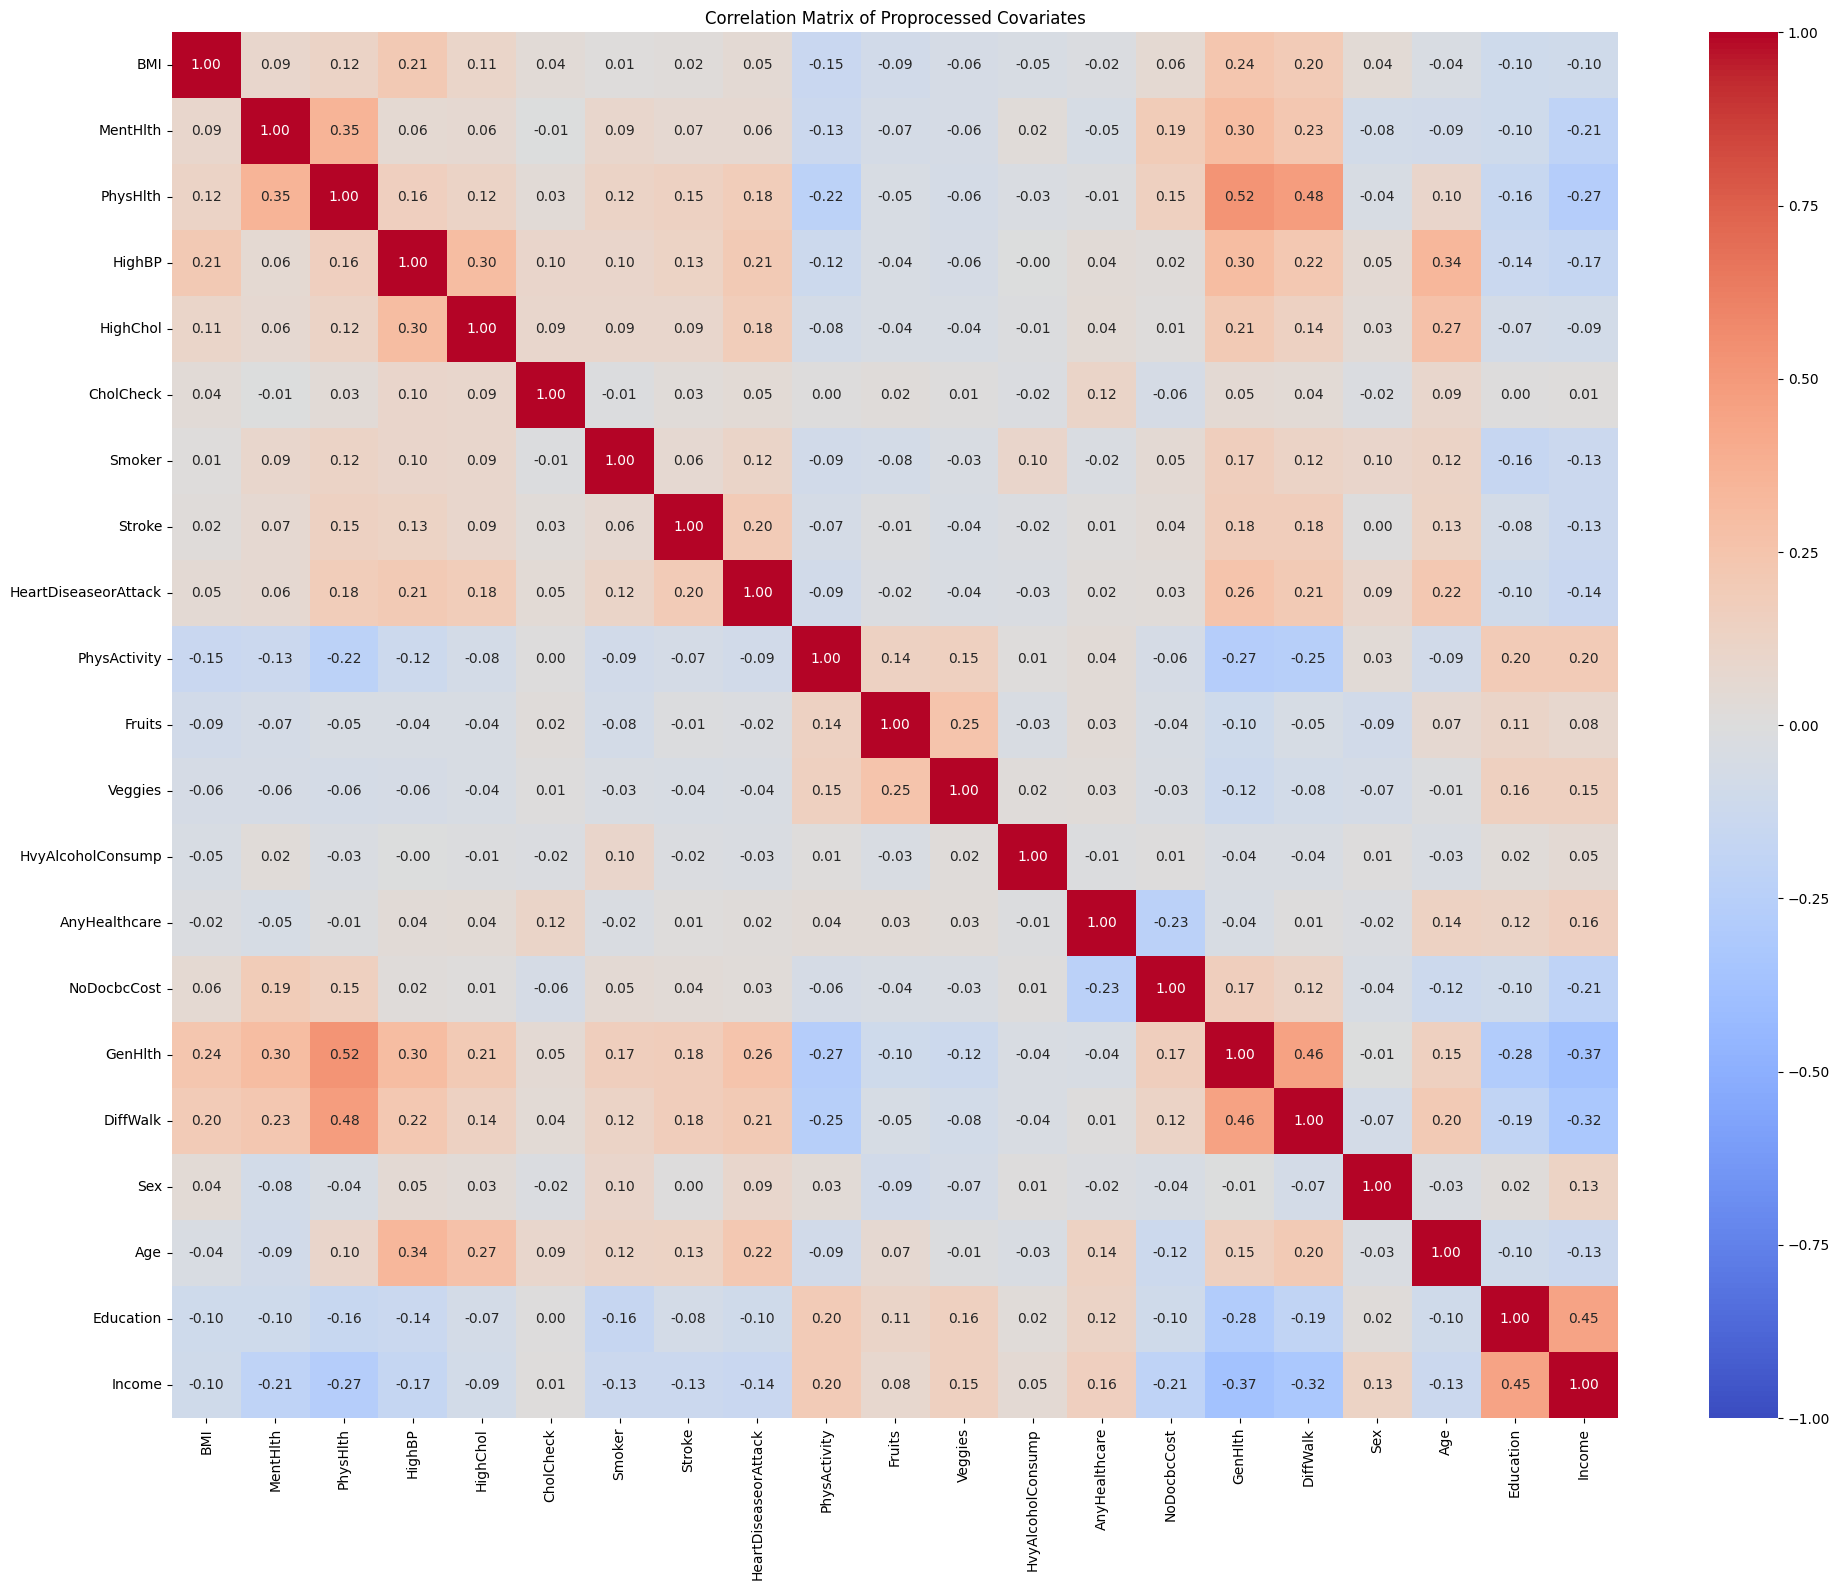

In [33]:
col = numeric_vars + categorical_vars
X_dev_transformed_df = pd.DataFrame(X_dev_transformed, columns=col)
corr_matrix = X_dev_transformed_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Proprocessed Covariates')
plt.tight_layout()
plt.show()